# Evaluating LoFTR Robustness

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df_full = pd.read_csv("robustness_results.csv")
df_full.head()

,fixed_image,moving_image,size,transform,magnitude,total_matches,conf_matches,inliers
0,1,3,1/4,original image,none,9330,5431,1757
1,1,3,1/4,Rotation,-30,1501,618,353
2,1,3,1/4,Rotation,-20,2630,1653,596
3,1,3,1/4,Rotation,-10,3133,2341,712
4,1,3,1/4,Rotation,0,3261,2456,2814


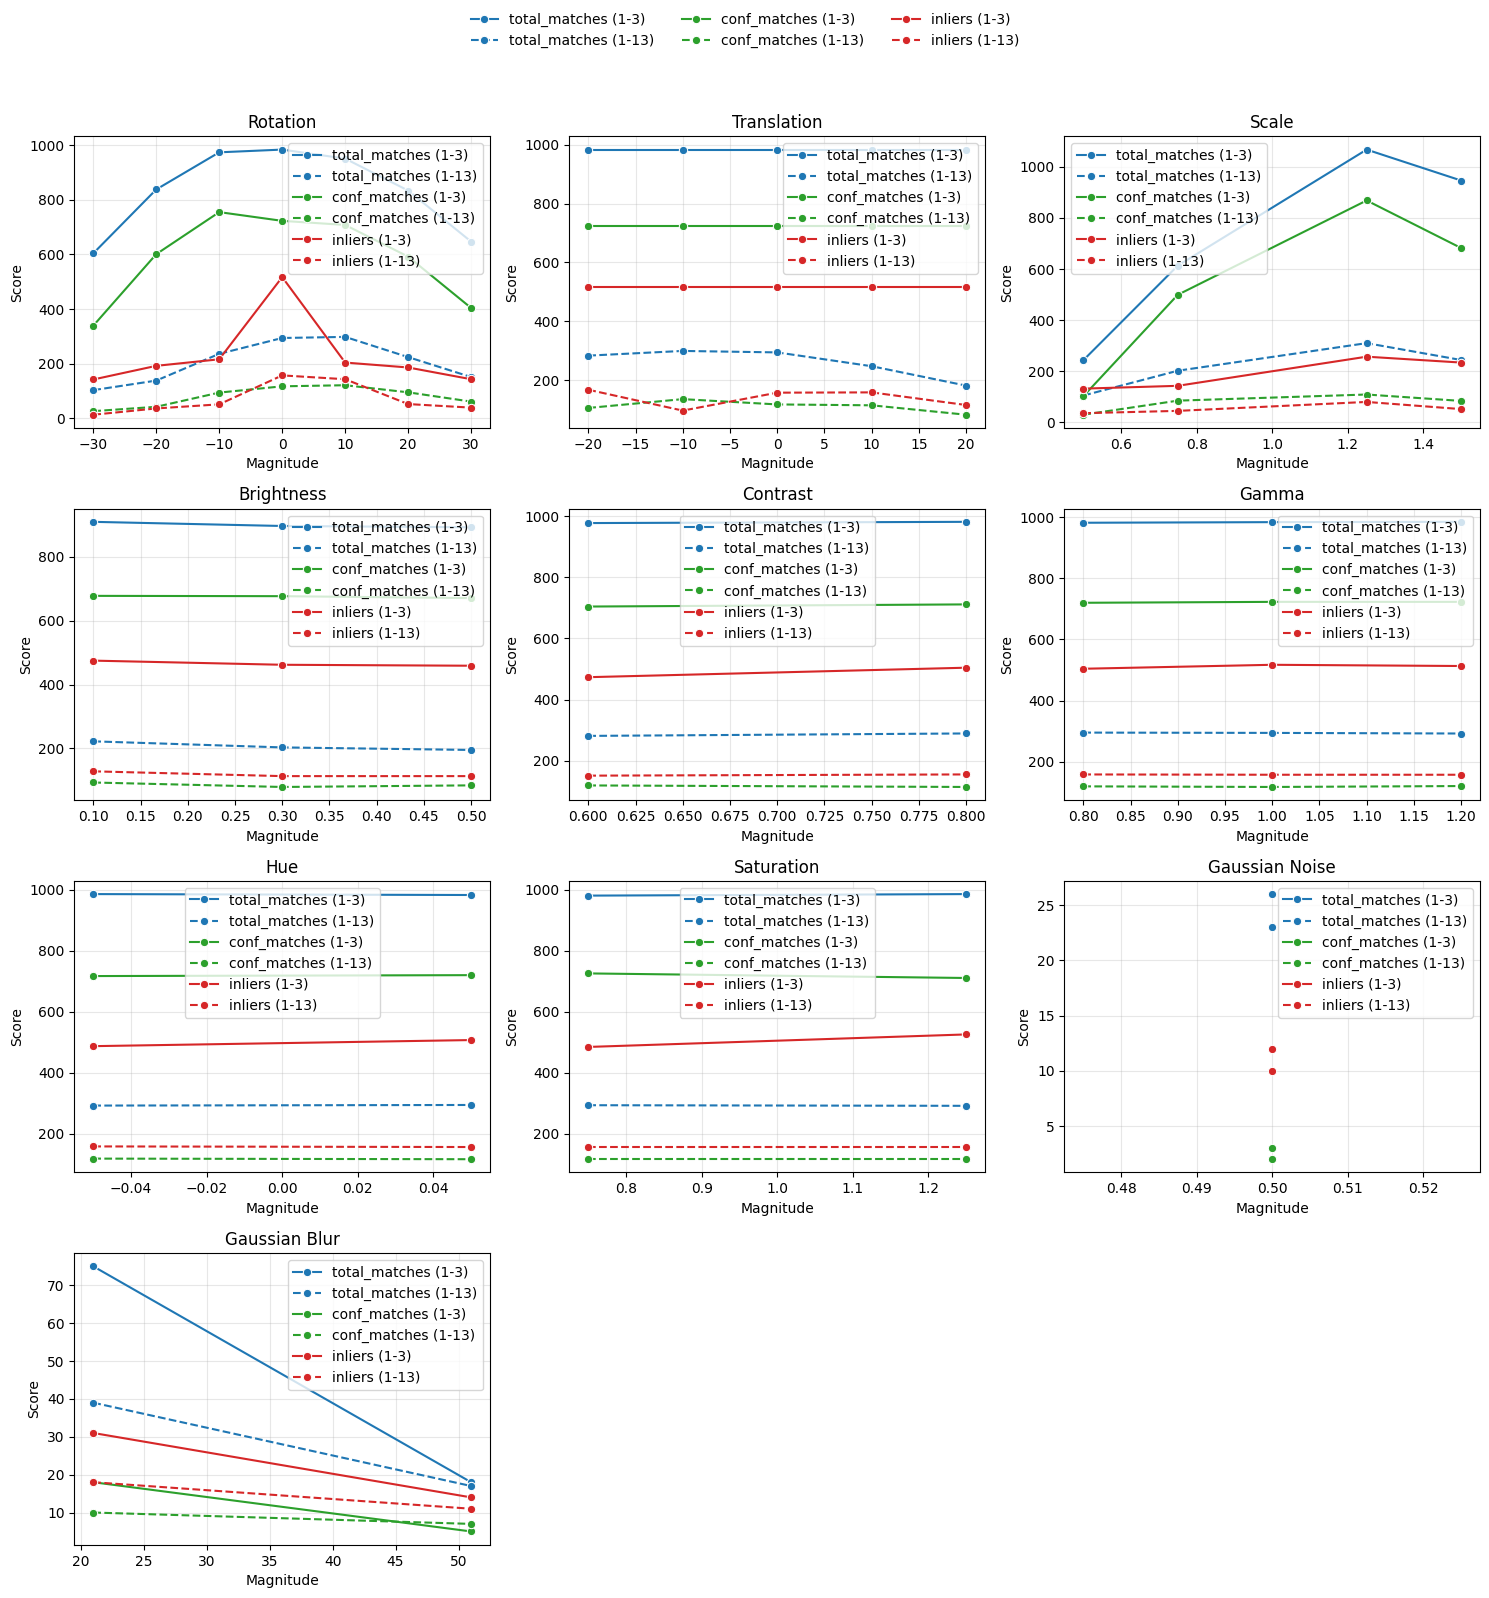

In [2]:
# Convert magnitude to numeric
df_full["magnitude"] = pd.to_numeric(df_full["magnitude"], errors="coerce")

# Filter to size = "1/8"
df = df_full[(df_full["size"] == "1/8") & (df_full["transform"] != "original image")]

# Metrics you want to plot in each subplot
metrics = ["total_matches", "conf_matches", "inliers"]

# Consistent colors for metrics
palette = {
    "total_matches": "#1f77b4",  # blue
    "conf_matches": "#2ca02c",   # green
    "inliers": "#d62728",        # red
}

# Line styles for the two image pairs
pair_styles = {
    (1, 3): "-",
    (1, 13): "--",
}

transforms = df["transform"].unique()
n = len(transforms)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharey=False)
axes = axes.flatten()

for ax, t in zip(axes, transforms):

    sub = df[df["transform"] == t]

    # Plot curves for each metric & image pair
    for metric in metrics:
        for (f, m), ls in pair_styles.items():

            pair_df = sub[
                (sub["fixed_image"] == f) &
                (sub["moving_image"] == m)
            ].sort_values("magnitude")

            if len(pair_df) > 0:
                sns.lineplot(
                    data=pair_df,
                    x="magnitude",
                    y=metric,
                    label=f"{metric} ({f}-{m})",
                    ax=ax,
                    marker="o",
                    linestyle=ls,
                    color=palette[metric]
                )

    ax.set_title(t)
    ax.set_xlabel("Magnitude")
    ax.set_ylabel("Score")
    ax.grid(True, alpha=0.3)

# Hide unused axes
for ax in axes[len(transforms):]:
    ax.set_visible(False)

# Build a combined legend with unique entries
handles, labels = [], []
for ax in axes[:len(transforms)]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate legend entries
uniq = dict(zip(labels, handles))

fig.legend(
    uniq.values(),
    uniq.keys(),
    loc="upper center",
    ncol=3,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

In [9]:
df_original_image = df_full[(df_full["size"] == "1/4") & (df_full["transform"] == "original image")].sort_values('moving_image')
df_original_image.head()

,fixed_image,moving_image,size,transform,magnitude,total_matches,conf_matches,inliers
0,1,3,1/4,original image,NaN,9330,5431,1757
64,1,13,1/4,original image,NaN,5935,2904,945


In [10]:
df_eroded_image = df_full[(df_full["size"] == "1/4") & (df_full["transform"] == "Rotation") & (df_full["magnitude"]==0)].sort_values('moving_image')
df_eroded_image.head()

,fixed_image,moving_image,size,transform,magnitude,total_matches,conf_matches,inliers
4,1,3,1/4,Rotation,0.0,3261,2456,2814
68,1,13,1/4,Rotation,0.0,595,237,232
